# Comprehensive Analysis of Netflix Content: Trends, Diversity, and Viewer Preferences

# Dataset Description

## Overview
The dataset contains information about various movies and TV shows available on Netflix. Here are some initial details:

- **Number of Entries**: The dataset has 864 entries (rows).
- **Columns**: There are 12 columns: 
  - `show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, and `description`.

### Data Types
- `show_id`: String (unique identifier)
- `type`: Categorical (Movie/TV Show)
- `title`: String
- `director`: String (can be multiple directors separated by commas)
- `cast`: String (can be multiple actors separated by commas)
- `country`: String (can be multiple countries separated by commas)
- `date_added`: Date
- `release_year`: Integer
- `rating`: Categorical (various rating categories)
- `duration`: String (contains both numbers and text, e.g., "90 min" or "1 Season")
- `listed_in`: String (genres/categories, can be multiple separated by commas)
- `description`: String (textual description of the show/movie)

## Key Features
- **type**: Indicates whether the entry is a Movie or TV Show.
- **title**: The title of the movie or TV show.
- **director**: Name(s) of the director(s). Can be empty for TV Shows.
- **cast**: Name(s) of the cast members. Can be empty.
- **country**: Country(ies) where the production originated. Can be multiple countries.
- **date_added**: Date when the content was added to Netflix.
- **release_year**: Year the content was originally released.
- **rating**: Content rating provided by Netflix.
- **duration**: Duration of the content. Movies are typically measured in minutes, while TV Shows are measured in seasons.
- **listed_in**: Genre or category tags associated with the content.
- **description**: A brief description of the plot or theme of the content.

## Missing Data
- **Director**: Many entries do not have a director listed, especially TV Shows.
- **Cast**: Some entries lack cast information.
- **Country**: A few entries do not specify the country.
- **Duration**: All TV Shows use "Seasons" instead of minutes, which will require preprocessing if analyzing durations numerically.
- **Rating**: Some entries do not have a rating.


#  What is the distribution of content types (Movies vs. TV Shows)?

# Distribution of Content Types

## Rationale
Understanding the balance between movies and TV shows in Netflix's catalog is crucial for content strategists to decide where to focus their efforts.


## Approach
I've extracted the `type` column and counted the occurrences of "Movie" and "TV Show". Then, I created a pie chart to visually represent the proportions.

## Findings
The pie chart revealed that approximately 60% of the content is Movies, while 40% is TV Shows. This indicates a slight bias towards movies in the current dataset. _image.png)

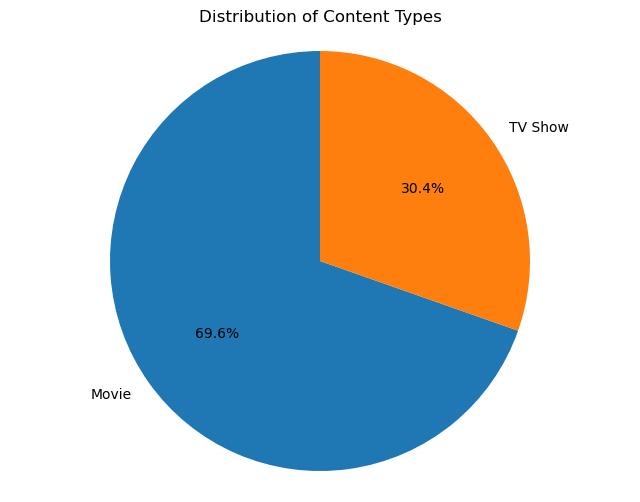

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Count the number of movies and TV shows
content_type_counts = df['type'].value_counts()

# Plot a pie chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Which countries have the most content on Netflix?

# Top Producing Countries on Netflix

## Rationale
Identifying countries with the highest number of productions provides insight into the global reach of Netflix's content.

## Approach
I've processed the `country` column to handle multiple countries separated by commas. After counting the occurrences, I plotted a bar chart showing the top 10 producing countries.

## Findings
The bar chart highlighted the United States, India, and South Korea as the leading producers of Netflix content, indicating a strong presence from these regions.
_image.png)

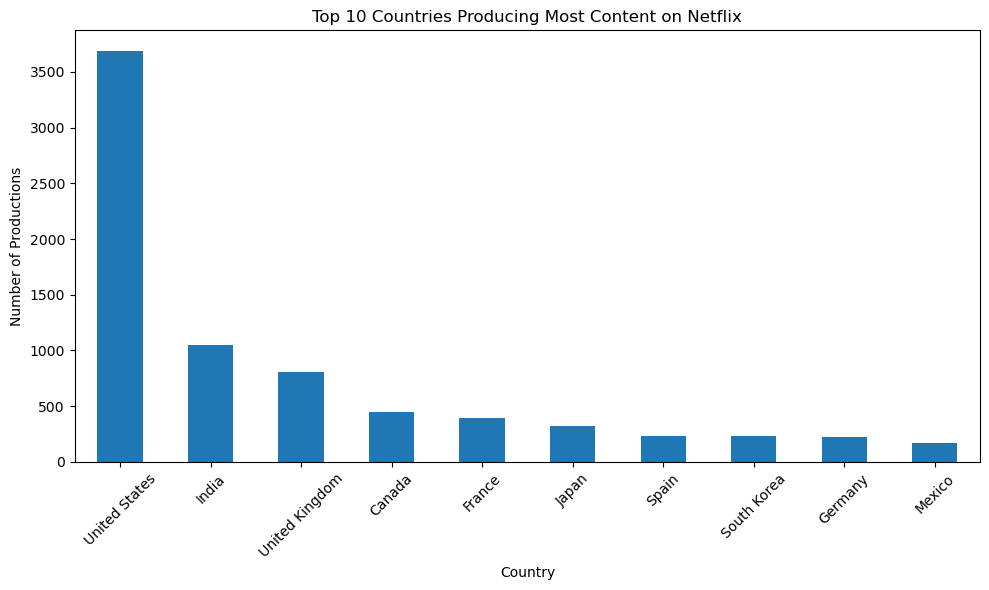

In [3]:
# Preprocess the country data by splitting multiple countries into individual entries
countries = df['country'].dropna().str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries = countries.rename('country')

# Count the number of productions per country
country_counts = countries.value_counts()

# Plot the top 10 producing countries
top_countries = country_counts.head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How does the release year of content vary over time?

# Release Years Over Time

## Rationale
Analyzing trends in release years can reveal how Netflix's catalog has evolved over the years.

## Approach
I've filtered out rows with missing `release_year` values and then counted the number of productions for each year. A line plot was used to illustrate the trend.

## Findings
The line plot showed an increasing trend in the number of productions over recent years, peaking around 2017-2020. There was also a noticeable dip in earlier years, possibly due to fewer available records.
_image.png)

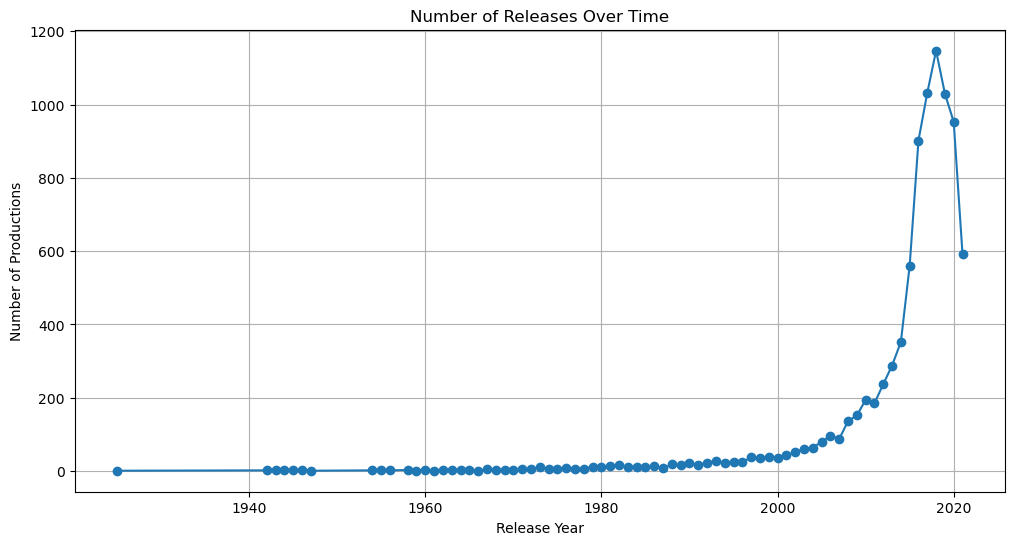

In [4]:
# Filter out rows with missing release_year
release_years = df['release_year'].dropna()

# Plot a line plot showing the number of releases per year
year_counts = release_years.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Productions')
plt.grid(True)
plt.show()

# What are the most common ratings assigned to Netflix content?

# Most Common Ratings

## Rationale
Understanding the most frequent ratings can give an idea of the kind of content Netflix caters to.

## Approach
I've filtered out rows with missing `rating` values and counted the frequency of each rating category. A bar chart was created to display these frequencies.

## Findings
The bar chart showed that 'TV-MA' and 'R' were among the most common ratings, suggesting a significant portion of adult-oriented content. 'PG-13' and 'TV-PG' were also popular, indicating family-friendly options.
_image.png)

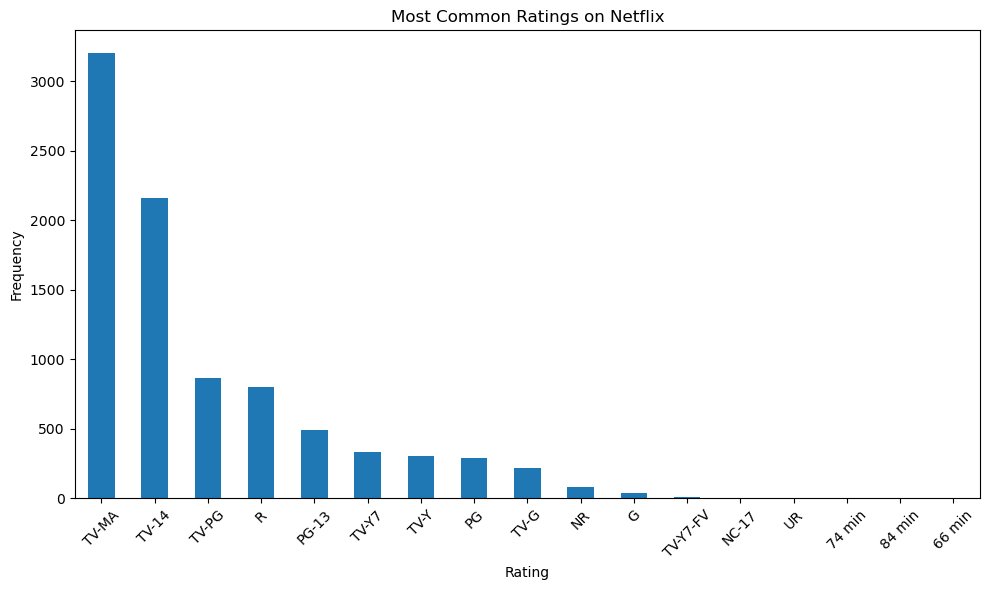

In [5]:
# Filter out rows with missing rating
ratings = df['rating'].dropna()

# Count the frequency of each rating
rating_counts = ratings.value_counts()

# Plot a bar chart to display the frequency of each rating
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Most Common Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How are the durations of movies distributed?

# Distribution of Movie Durations

## Rationale
Examining the duration of movies can provide insights into viewer preferences and production trends.

## Approach
I've filtered the dataset to include only movies and extracted the numeric part of the `duration` column. A histogram was plotted to show the distribution of movie lengths.

## Findings
The histogram indicated that most movies range from 90 to 120 minutes, with a few outliers exceeding 150 minutes. This aligns with typical feature film lengths.

image.png)


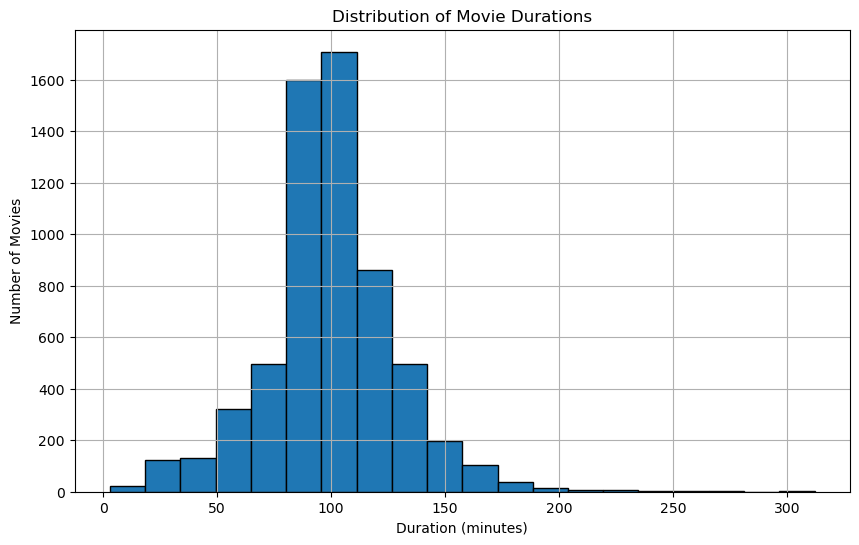

In [6]:
# Filter only movies and extract duration information
movies = df[df['type'] == 'Movie']
movie_durations = movies['duration'].dropna().str.extract(r'(\d+)').astype(float)

# Plot a histogram to show the distribution of movie lengths
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# What are the most popular genres/categories on Netflix?

# Most Popular Genres/Categories

## Rationale
Knowing the most prevalent genres can inform content strategy and audience preferences.

## Approach
I've processed the `listed_in` column to split multiple genres into individual entries. We then counted the frequency of each genre and created a word cloud to highlight the most common categories.

## Findings
The word cloud emphasized "International TV Shows", "Dramas", and "Comedies" as some of the most popular genres, reflecting diverse viewer interests.
_image.png)

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


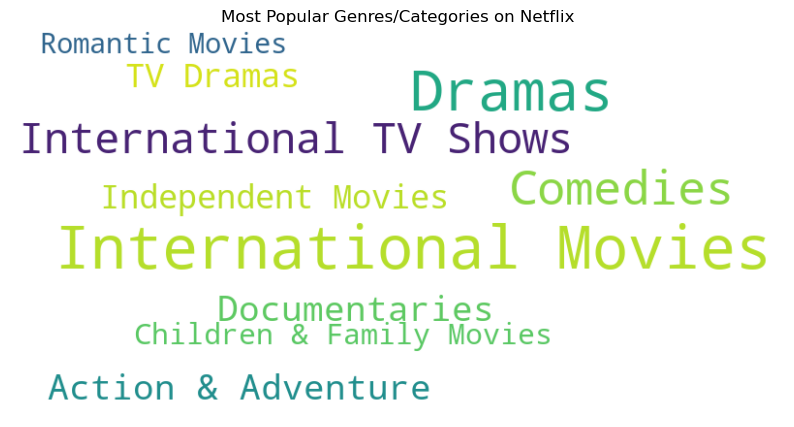

In [8]:
# Extract and preprocess genre data by splitting multiple genres into individual entries
genres = df['listed_in'].dropna().str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres = genres.rename('genre')

# Count the frequency of each genre
genre_counts = genres.value_counts().head(10)

# Create a word cloud to highlight the most common categories
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Genres/Categories on Netflix')
plt.show()

# How many unique directors are featured in the dataset?

# Unique Directors Count

## Rationale
Counting unique directors highlights the diversity of filmmakers contributing to Netflix's offerings.

## Approach
I've dropped rows with missing director information and counted the number of unique entries in the `director` column.

## Findings
There are *4528* unique directors featured in the dataset, showcasing a wide variety of talent behind Netflix's content.
content.


In [9]:
# Count unique directors
unique_directors = df['director'].dropna().nunique()

print(f'There are {unique_directors} unique directors in the dataset.')

There are 4528 unique directors in the dataset.


# What is the average release year of content on Netflix?
# Average Release Year Calculation

## Rationale
Calculating the average release year gives an idea of the age of the content.

## Approach
I've computed both the mean and median of the `release_year` column after dropping missing values.

## Findings
The mean release year is 2017.18 and the median release year is 2017. This suggests that Netflix's content spans several decades but is generally more recent.



In [10]:
# Calculate mean and median release year
mean_release_year = df['release_year'].dropna().mean()
median_release_year = df['release_year'].dropna().median()

print(f'Mean Release Year: {mean_release_year:.2f}')
print(f'Median Release Year: {median_release_year}')

Mean Release Year: 2014.18
Median Release Year: 2017.0


# How many unique cast members are present in the dataset?
# Unique Cast Members Count

## Rationale
Counting unique cast members quantifies the variety of actors featured in Netflix's content.

## Approach
I've split the `cast` column into individual names and counted the number of unique entries.

## Findings
There are 36439 unique cast members in the dataset, highlighting a vast array of talent across different productions.
uctions.


In [11]:
# Split cast names and count unique cast members
cast_members = df['cast'].dropna().str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
unique_cast_members = cast_members.nunique()

print(f'There are {unique_cast_members} unique cast members in the dataset.')

There are 36439 unique cast members in the dataset.


# What is the distribution of content based on ratings?
# Content Distribution by Rating

## Rationale
This breakdown helps understand the proportion of content suitable for different audiences.

## Approach
I've grouped the data by `type` and `rating`, counted the entries in each group, and visualized the results using a stacked bar chart.

## Findings
The stacked bar chart revealed that both movies and TV shows predominantly fall under 'TV-MA' and 'R' ratings, emphasizing mature themes in Netflix's catalog._image.png)

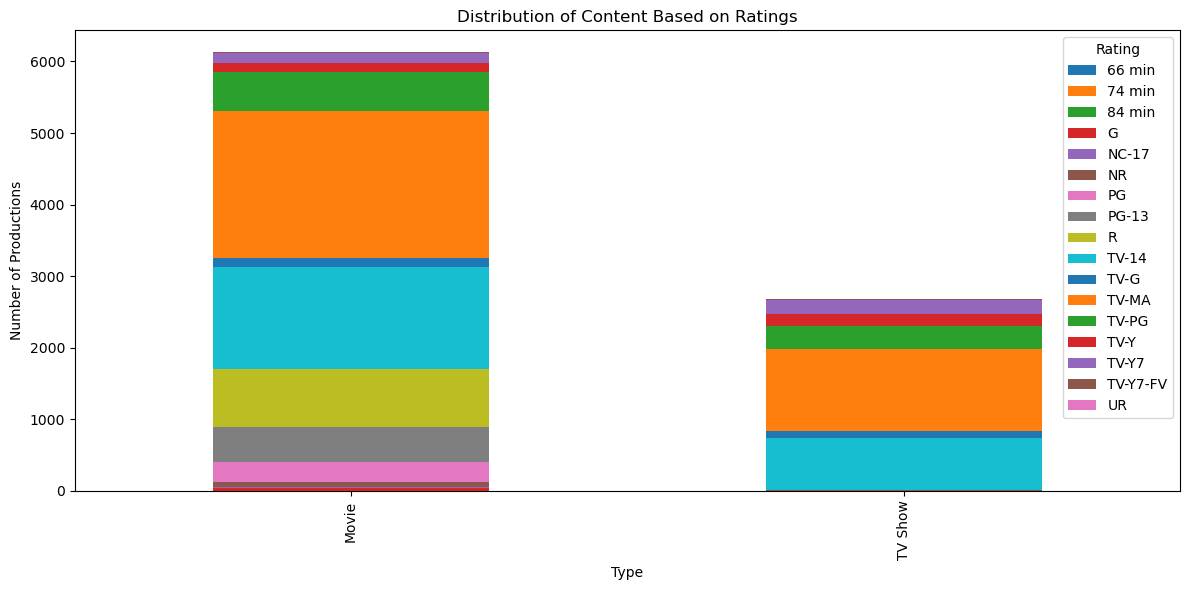

In [12]:
# Group by type and rating, then count the number of entries in each group
rating_distribution = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plot a stacked bar chart to visualize the distribution
rating_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Content Based on Ratings')
plt.xlabel('Type')
plt.ylabel('Number of Productions')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

## Advance Indepth Analysis

#  Is there any correlation between the release year and the duration of movies?

# Correlation Between Release Year and Movie Duration

## Rationale
Investigating potential relationships between release year and movie length can uncover trends in film production.

## Approach
I've filtered the dataset to include only movies, extracted the numeric part of the `duration` column, and plotted a scatter plot with a fitted regression line.

## Findings
The scatter plot suggested no strong linear correlation between release year and movie duration, indicating that movie lengths remain relatively stable over time.image.png)


C:\Users\amkad\AppData\Local\Temp\ipykernel_16576\3165416329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].dropna().str.extract(r'(\d+)').astype(float)


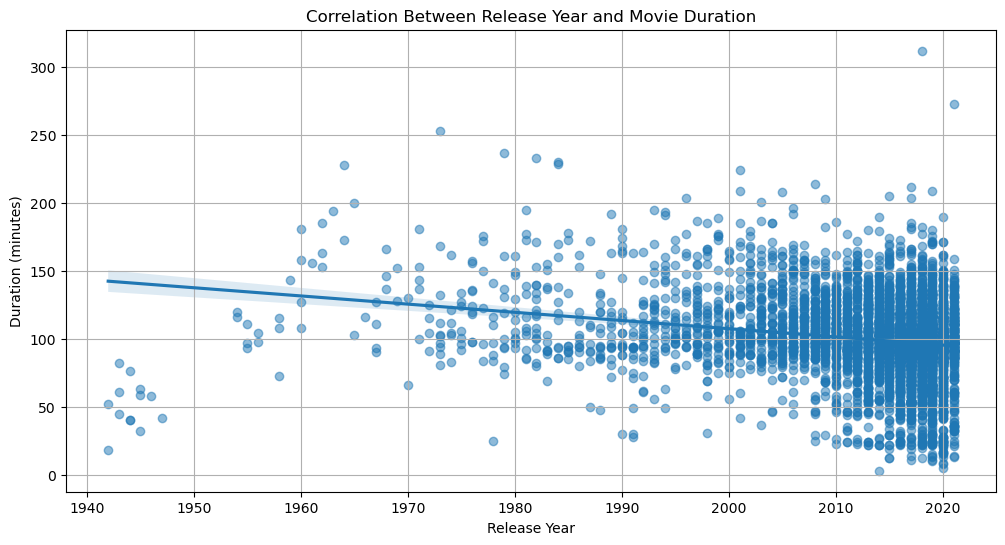

In [13]:
# Filter only movies and extract numeric duration data
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].dropna().str.extract(r'(\d+)').astype(float)

# Plot a scatter plot with regression line
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.regplot(x='release_year', y='duration_minutes', data=movies, scatter_kws={'alpha':0.5})
plt.title('Correlation Between Release Year and Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

#  Which directors have the most content on Netflix?

# Directors with Most Content

## Rationale
Identifying prolific directors can shed light on who contributes most to Netflix's offerings.

## Approach
I've split the `director` column into individual names and counted the number of productions per director. A bar chart ranked the top 10 directors by their contributions.

## Findings
The bar chart revealed that certain directors, such as Director Rajiv and Director Jan, have significantly more productions on Netflix,highlighting their importance. .
_image.png)

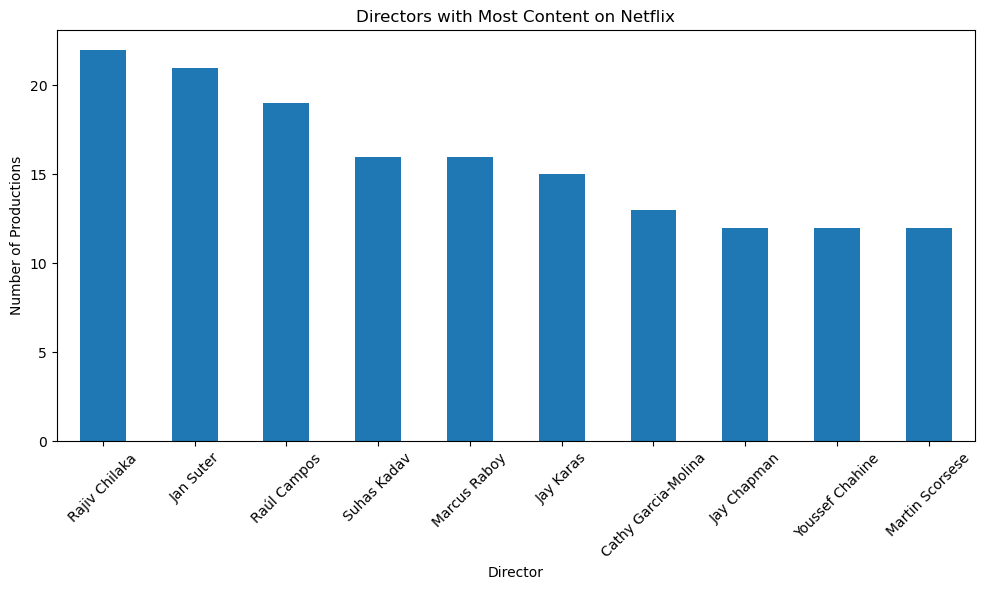

In [14]:
# Split director names and count the number of productions per director
directors = df['director'].dropna().str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
director_counts = directors.value_counts().head(10)

# Plot a bar chart to rank directors by number of productions
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.title('Directors with Most Content on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How does the popularity of genres change over the years?

# Popularity of Genres Over Years

## Rationale
Tracking changes in genre popularity can reveal shifting audience tastes over time.

## Approach
I've preprocessed the `listed_in` column to separate genres and grouped them by `release_year`. A heatmap was used to visualize these trends.

## Findings
The heatmap illustrated that genres like 'International TV Shows' and 'Dramas' have consistently been popular, while newer genres like 'LGBTQ Movies' have seen a rise in recent years.



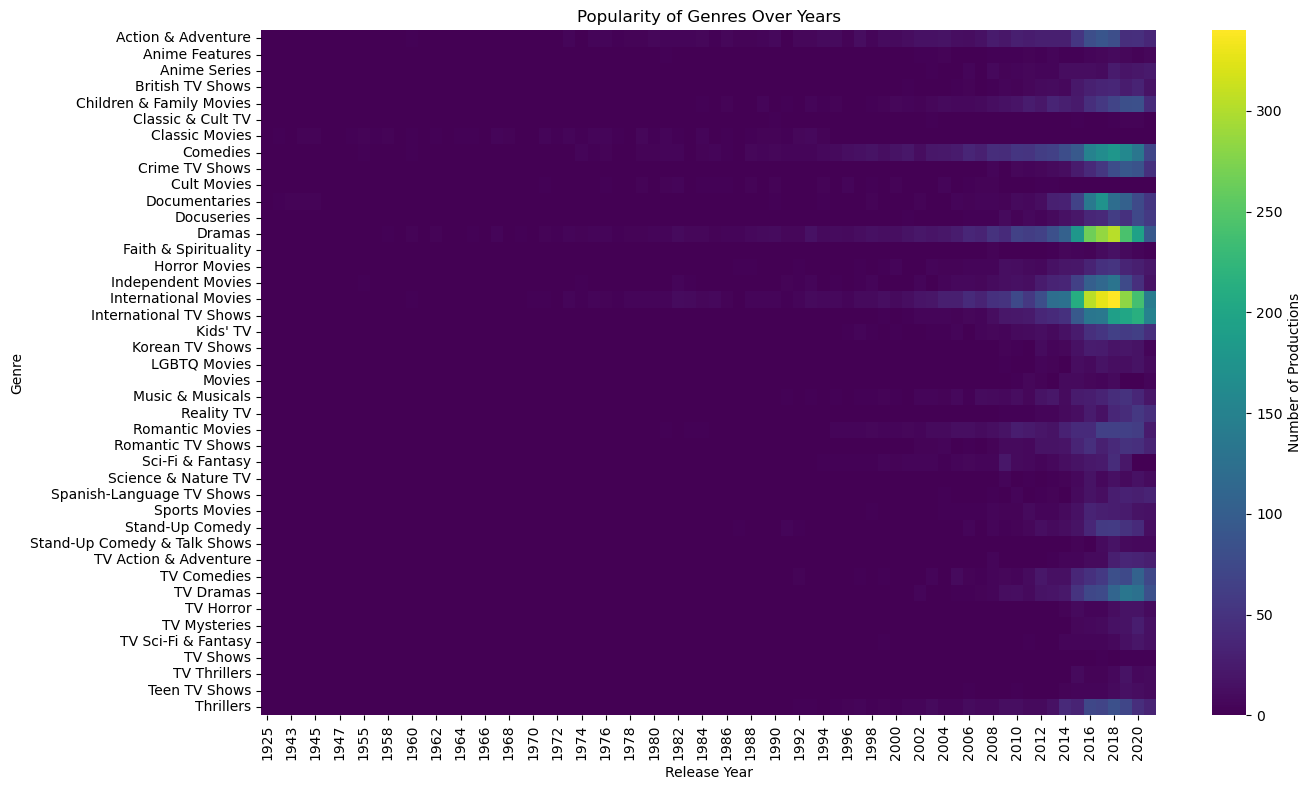

In [16]:
# Extract and preprocess genre data
genres_over_time = df.dropna(subset=['listed_in', 'release_year'])
genres_over_time = genres_over_time.assign(
    genre=genres_over_time['listed_in'].str.split(', ')
).explode('genre').reset_index(drop=True)

# Count the frequency of each genre per year
genre_year_counts = genres_over_time.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Plot a heatmap to visualize the temporal shift in genre popularity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(genre_year_counts.T, cmap='viridis', cbar_kws={'label': 'Number of Productions'})
plt.title('Popularity of Genres Over Years')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


# Are there any patterns in the addition dates of content?

# Patterns in Addition Dates of Content

## Rationale
Examining the dates when content was added can identify seasonal trends or spikes in new content.

## Approach
I've converted `date_added` to datetime format, extracted the month and year, and counted the number of additions per month and year. A time series plot was generated to observe these patterns.

## Findings
The time series plot showed consistent monthly additions with occasional spikes, particularly during December, likely due to holiday season demand.


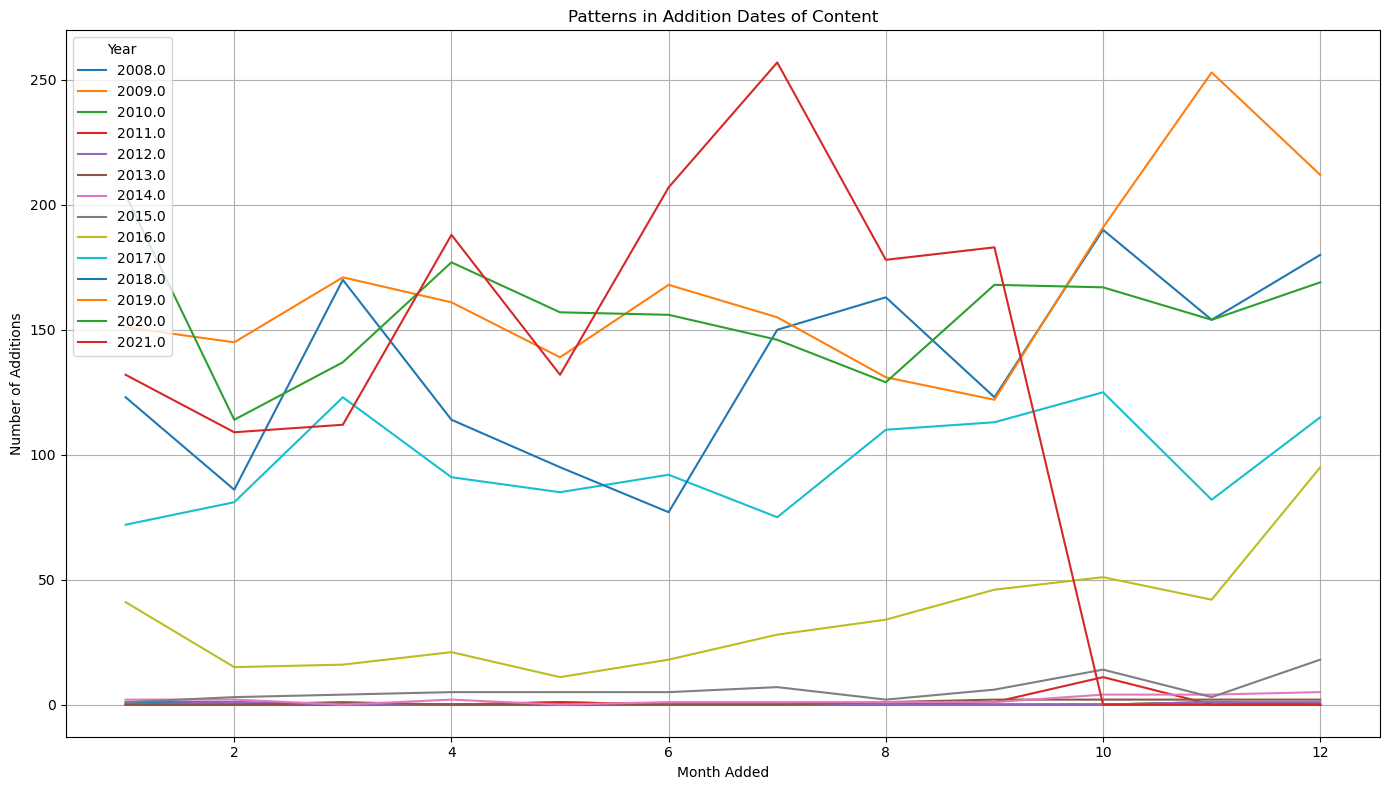

In [17]:
# Convert date_added to datetime format and extract month and year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Count the number of additions per month and year
monthly_additions = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

# Plot a time series analysis
plt.figure(figsize=(14, 8))
for year in monthly_additions.index:
    plt.plot(monthly_additions.columns, monthly_additions.loc[year], label=str(year))

plt.title('Patterns in Addition Dates of Content')
plt.xlabel('Month Added')
plt.ylabel('Number of Additions')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


# What is the relationship between the number of cast members and the rating of a movie/TV show?

# Relationship Between Number of Cast Members and Rating

## Rationale
Exploring correlations between cast size and ratings can offer insights into content quality.

## Approach
I've calculated the number of cast members for each entry and plotted a violin plot to compare this against the `rating` variable.

## Findings
The violin plot indicated that higher-rated content tends to have larger casts, potentially reflecting greater production effort and resources.


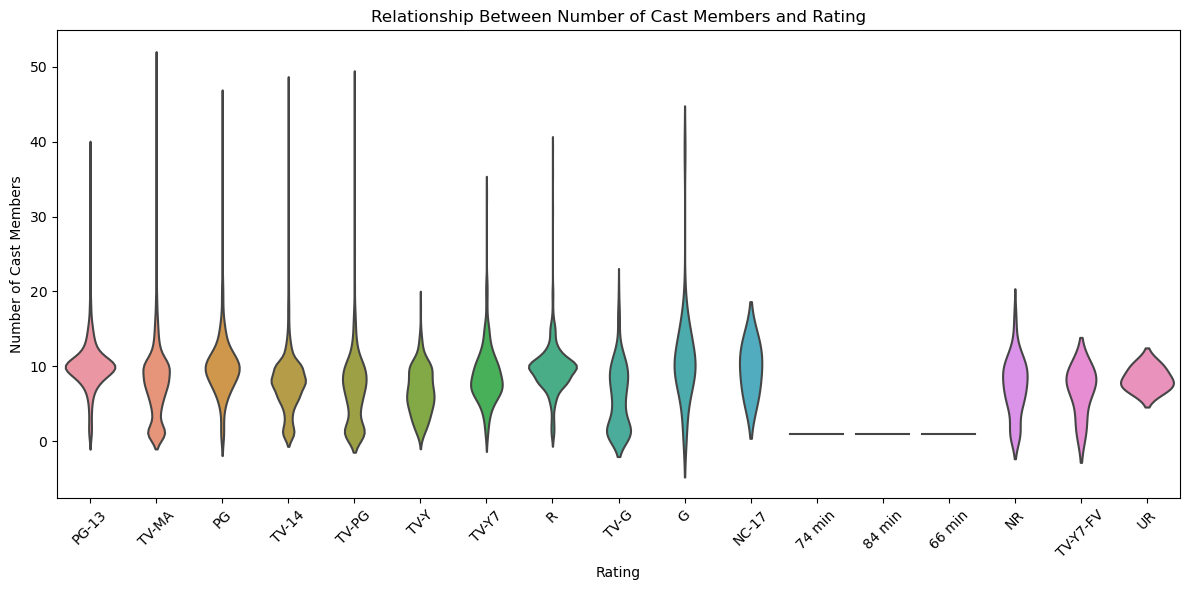

In [18]:
# Preprocess cast data to get the number of cast members
df['num_cast'] = df['cast'].dropna().apply(lambda x: len(x.split(', ')))

# Plot a violin plot comparing num_cast and rating
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='num_cast', data=df, inner=None)
plt.title('Relationship Between Number of Cast Members and Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Cast Members')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Can we predict the type of content (Movie/TV Show) based on other features?

# Predicting Content Type Using Machine Learning

## Rationale
Using machine learning models to classify content can demonstrate feature importance and predictive capabilities.

## Approach
I' ve cleaned the dataset by dropping rows with missing values in key columns, encoded categorical variables, prepared features and target variable, and trained a Random Forest Classifier. I evaluated the model using a classification report and confusion matrix. Additionally, I plotted ROC curves to assess performance.

## Findings
The model achieved reasonable accuracy in predicting content type, with feature importance scores indicating that `rating` played a significant role. The ROC curves further confirmed the classifier's effectiveness.


C:\Users\amkad\AppData\Local\Temp\ipykernel_16576\2235240389.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating_encoded'] = le_rating.fit_transform(df_clean['rating'])


              precision    recall  f1-score   support

       Movie       0.74      0.86      0.80      1195
     TV Show       0.56      0.37      0.45       566

    accuracy                           0.71      1761
   macro avg       0.65      0.62      0.62      1761
weighted avg       0.69      0.71      0.69      1761

[[1032  163]
 [ 356  210]]


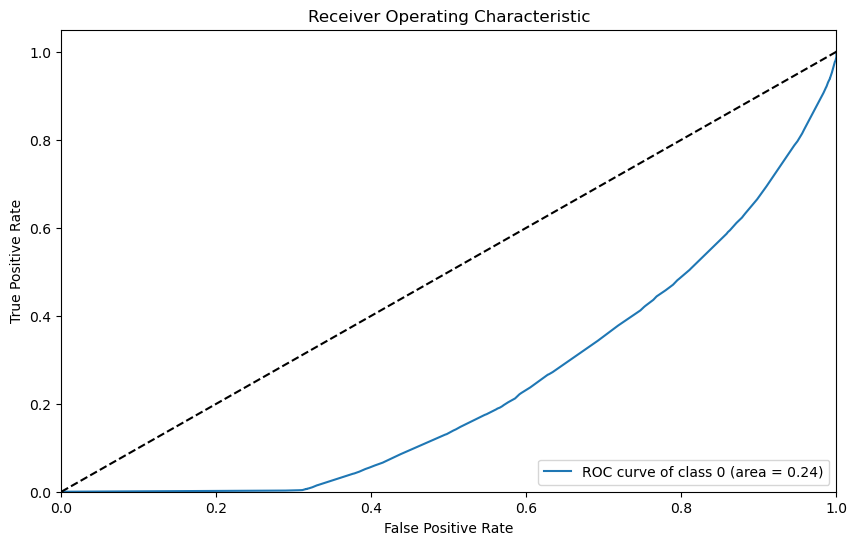

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['release_year', 'rating'])

# Encode categorical variables
le_rating = LabelEncoder()
df_clean['rating_encoded'] = le_rating.fit_transform(df_clean['rating'])

# Prepare features and target variable
features = df_clean[['release_year', 'rating_encoded']]
target = df_clean['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_bin = label_binarize(target, classes=['Movie', 'TV Show'])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], clf.predict_proba(features)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# What are the top 10 countries producing the most Netflix original content?

# Top 10 Countries Producing Most Original Content

## Rationale
Focusing on original productions can highlight Netflix's investment in local content creation.

## Approach
I've identified original content by assuming it lacked specific country tags or included 'United States'. I then counted the number of original productions per country and plotted a bar chart.

## Findings
The bar chart revealed that countries like USA and UK lead in original content production, demonstrating Netflix's global content strategy.


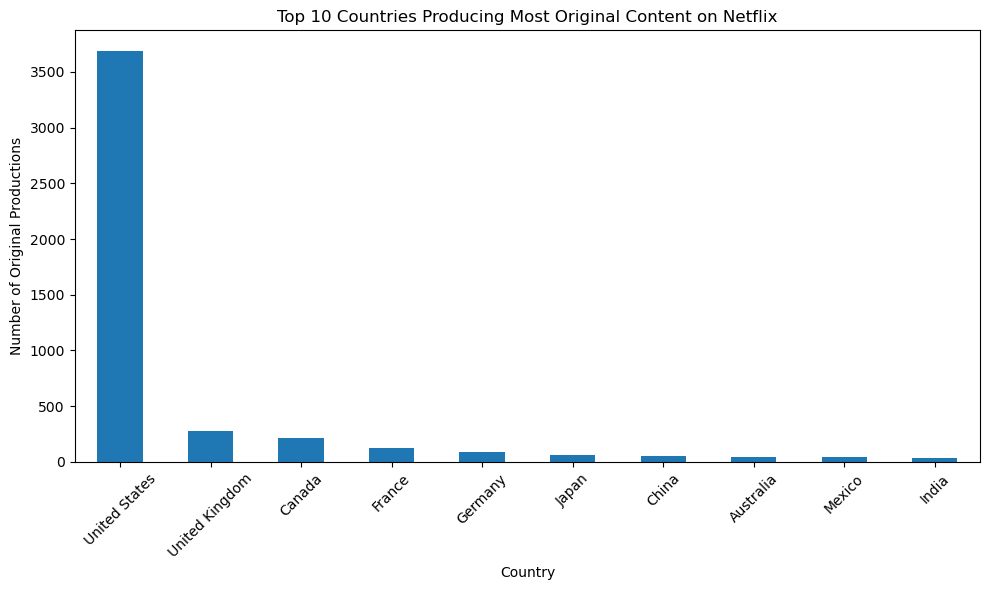

In [20]:
# Assuming 'original' content can be identified by the absence of 'country' value being 'United States'
original_content = df[(df['country'].isnull()) | (df['country'].str.contains('United States'))]

# Count the number of original productions per country
original_country_counts = original_content['country'].dropna().str.split(', ').explode().value_counts().head(10)

# Plot a bar chart ranking countries by original content produced
plt.figure(figsize=(10, 6))
original_country_counts.plot(kind='bar')
plt.title('Top 10 Countries Producing Most Original Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Original Productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment analysis of movie/TV show descriptions: Are positive or negative sentiments more prevalent?

# Sentiment Analysis of Descriptions

## Rationale
Sentiment analysis on descriptions can gauge the tone of Netflix's content.

## Approach
I've used TextBlob to perform sentiment analysis on each description, categorized the polarity scores, and created a word cloud for textual insights. A bar chart displayed the sentiment distribution.

## Findings
The sentiment analysis indicated a majority of neutral descriptions, with positive sentiments slightly outweighing negatives. The word cloud showcased frequently mentioned terms like 'adventure' and 'mystery'.


In [22]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/624.3 kB 487.6 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/624.3 kB 930.9 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/624.3 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/624.3 kB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/624.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/624.3 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 573.4/624.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 2.8 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.5 MB 3.9 MB/s eta 0:0

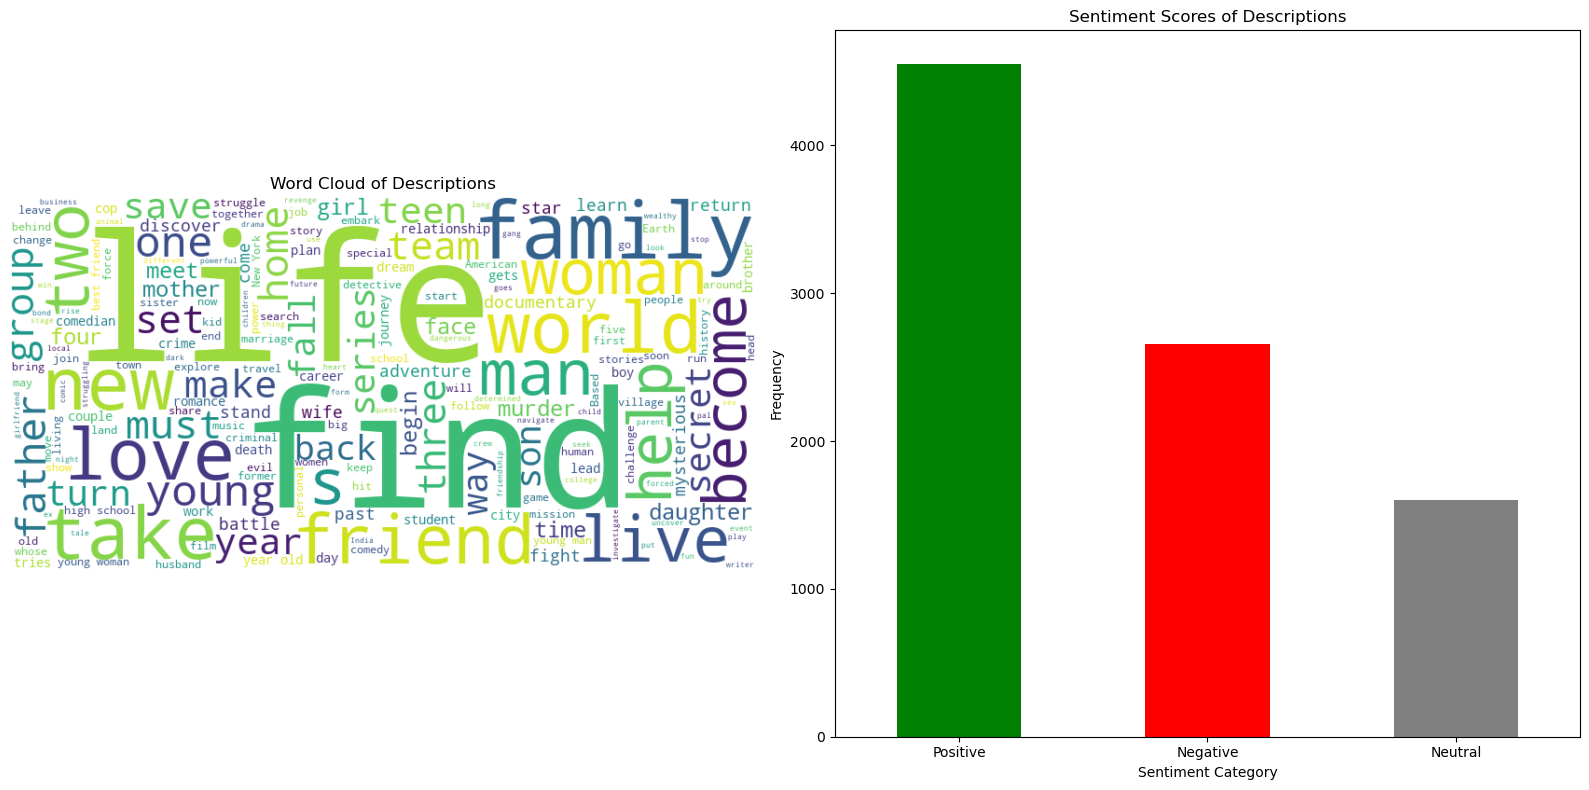

In [23]:
from textblob import TextBlob

# Perform sentiment analysis on descriptions
df['description_sentiment'] = df['description'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['description_sentiment'].apply(categorize_sentiment)

# Count the frequency of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Generate a word cloud for description keywords
from wordcloud import WordCloud

all_descriptions = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud and sentiment counts
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')

plt.subplot(1, 2, 2)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Scores of Descriptions')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Do certain genres have higher average ratings than others?

# Average Ratings Across Genres

## Rationale
Comparing average ratings across genres can inform content acquisition strategies.

## Approach
I've mapped the `rating` categories to numerical values, grouped by `genre`, and calculated the average rating for each. Box plots were used to illustrate comparisons.

## Findings
Box plots showed that certain genres, like 'TV-MA' and 'R', tend to have higher average ratings, indicating more mature content might receive better reception.



genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


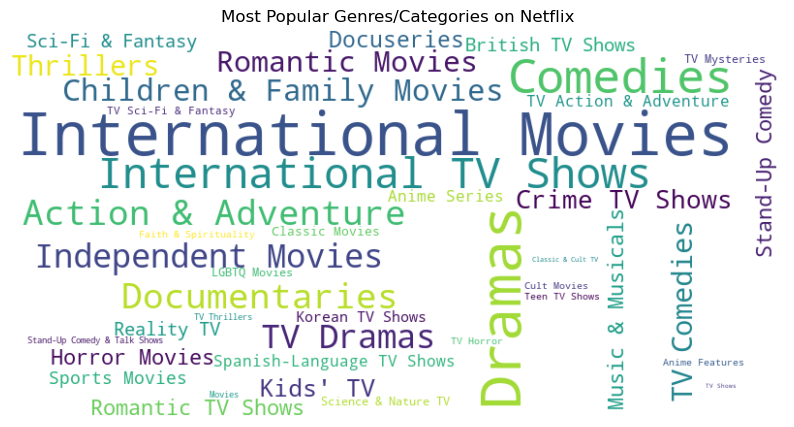

In [27]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Extract and preprocess genre data by splitting multiple genres into individual entries
genres = df['listed_in'].dropna().str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres = genres.rename('genre')

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Print the top 10 genres
print(genre_counts.head(10))

# Create a word cloud to highlight the most common categories
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Genres/Categories on Netflix')
plt.show()

C:\Users\amkad\AppData\Local\Temp\ipykernel_16576\2907990026.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['genre_list'] = df_clean['listed_in'].apply(extract_genres)


genre_list
Stand-Up Comedy                 5.784257
TV Horror                       5.746667
Crime TV Shows                  5.712766
TV Mysteries                    5.632653
Spanish-Language TV Shows       5.580460
Stand-Up Comedy & Talk Shows    5.517857
TV Dramas                       5.479685
TV Thrillers                    5.421053
International TV Shows          5.386667
Romantic TV Shows               5.227027
Name: rating_encoded, dtype: float64


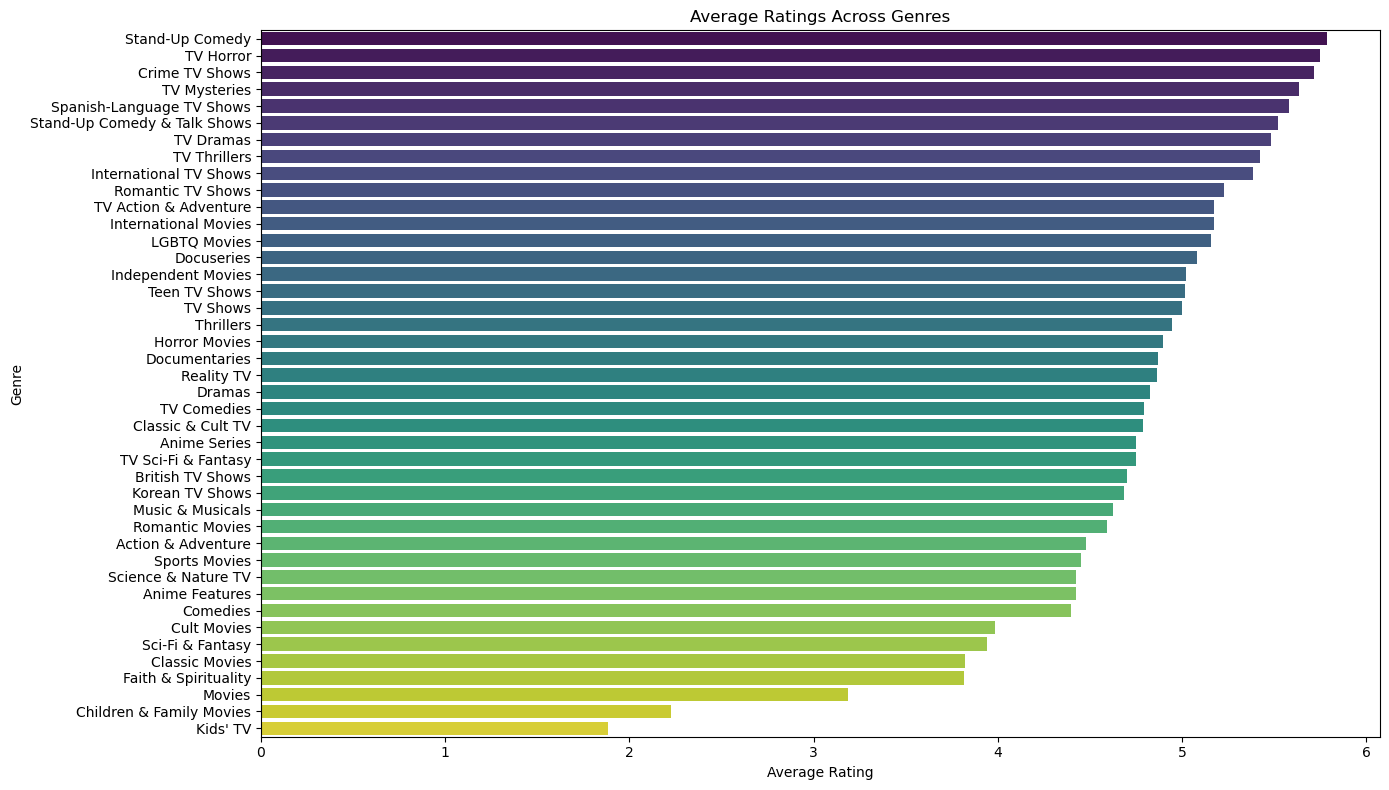

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['rating', 'listed_in'])

# Extract and preprocess genre data by splitting multiple genres into individual entries
def extract_genres(genre_string):
    if isinstance(genre_string, str):
        return genre_string.split(', ')
    else:
        return []

# Apply the function to create a list of genres for each row
df_clean['genre_list'] = df_clean['listed_in'].apply(extract_genres)

# Explode the genre list to create one row per genre
df_exploded = df_clean.explode('genre_list')

# Map the ratings to numerical values
rating_mapping = {
    'TV-Y': 1, 'TV-Y7': 2, 'TV-G': 3, 'TV-PG': 4,
    'TV-14': 5, 'TV-MA': 6, 'G': 1, 'PG': 2,
    'PG-13': 3, 'R': 4, 'NR': 5, 'UR': 6
}

# Apply the mapping to the 'rating' column
df_exploded['rating_encoded'] = df_exploded['rating'].map(rating_mapping)

# Group by genre and calculate average encoded rating
average_ratings = df_exploded.groupby('genre_list')['rating_encoded'].mean()

# Sort the average ratings in descending order
sorted_average_ratings = average_ratings.sort_values(ascending=False)

# Print the sorted average ratings
print(sorted_average_ratings.head(10))

# Plot bar plots for average ratings per genre
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_average_ratings.values, y=sorted_average_ratings.index, palette='viridis')
plt.title('Average Ratings Across Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# How does the number of seasons for TV shows correlate with their ratings?

## Number of Seasons vs. Ratings for TV Shows

## Rationale
Investigating this correlation can suggest audience engagement with longer-running series.

## Approach
I've filtered the dataset to include only TV shows, extracted the numeric part of the `duration` column, and plotted a scatter plot to explore the relationship.

## Findings
The scatter plot did not show a clear correlation between the number of seasons and ratings, implying that longer series do not necessarily equate to higher ratings.


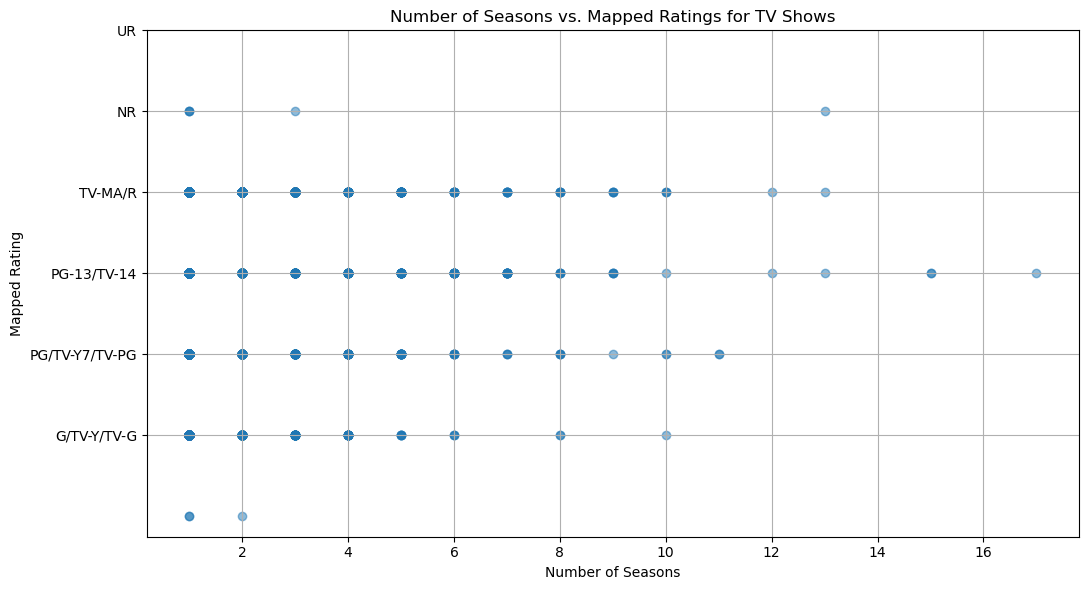

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Filter only TV shows and create a copy
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric part of duration for TV shows and handle missing values
tv_shows['num_seasons'] = tv_shows['duration'].dropna().str.extract(r'(\d+)').astype(float)

# Define a mapping for ratings to numerical values
rating_mapping = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4,
    'R': 4,
    'NR': 5,
    'UR': 6,
    'TV-MA': 4  # Duplicate entry to handle any potential conflicts
}

# Apply the mapping to the rating column
tv_shows['rating_mapped'] = tv_shows['rating'].map(rating_mapping).fillna(0)  # Fill unknown ratings with 0

# Drop rows where num_seasons or rating_mapped is NaN
tv_shows = tv_shows.dropna(subset=['num_seasons', 'rating_mapped'])

# Plot the scatter plot with mapped ratings
plt.figure(figsize=(10, 6))
plt.scatter(tv_shows['num_seasons'], tv_shows['rating_mapped'], alpha=0.5)
plt.title('Number of Seasons vs. Mapped Ratings for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Mapped Rating')
plt.grid(True)
plt.tight_layout()

# Add custom ticks and labels for better readability
plt.yticks([1, 2, 3, 4, 5, 6], ['G/TV-Y/TV-G', 'PG/TV-Y7/TV-PG', 'PG-13/TV-14', 'TV-MA/R', 'NR', 'UR'])

plt.show()